<a href="https://colab.research.google.com/github/firodriguezb/ChallengeTiendas/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

facturacion_total = tiendas['Precio'].sum()
print(f"Facturación total: ${facturacion_total:,.2f} COP")

tiendas['Fecha de Compra'] = pd.to_datetime(tiendas['Fecha de Compra'], dayfirst=True)
tiendas['Año'] = tiendas['Fecha de Compra'].dt.year
facturacion_anual = tiendas.groupby('Año')['Precio'].sum()
print("\nFacturación por año:")
print(facturacion_anual.to_string())

Facturación total: $4,403,619,200.00 COP

Facturación por año:
Año
2020    1.341955e+09
2021    1.424114e+09
2022    1.327452e+09
2023    3.100980e+08


# 2. Ventas por categoría

Ventas por categoría:
Categoría del Producto
Electrónicos               1.660576e+09
Electrodomésticos          1.324751e+09
Muebles                    7.576610e+08
Instrumentos musicales     3.487726e+08
Deportes y diversión       1.429777e+08
Juguetes                   7.360440e+07
Artículos para el hogar    5.757980e+07
Libros                     3.769610e+07


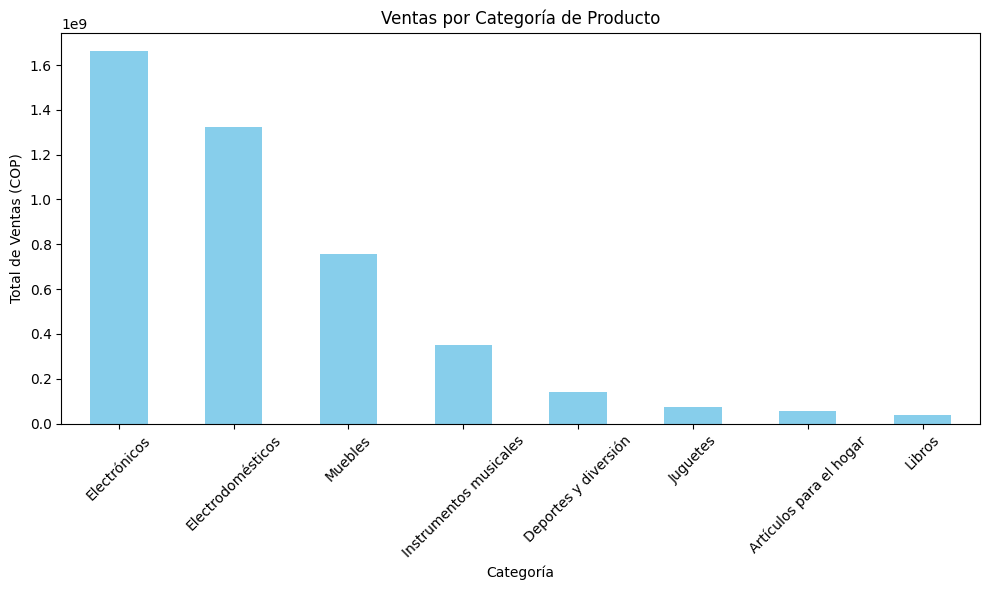

In [5]:
ventas_por_categoria = tiendas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
print("Ventas por categoría:")
print(ventas_por_categoria.to_string())

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
ventas_por_categoria.plot(kind='bar', color='skyblue')
plt.title('Ventas por Categoría de Producto')
plt.ylabel('Total de Ventas (COP)')
plt.xlabel('Categoría')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [6]:
calificacion_promedio = tiendas['Calificación'].mean()
print(f"Calificación promedio general: {calificacion_promedio:.2f}/5")

calificacion_por_categoria = tiendas.groupby('Categoría del Producto')['Calificación'].mean().sort_values(ascending=False)
print("\nCalificación promedio por categoría:")
print(calificacion_por_categoria.to_string())

calificacion_por_vendedor = tiendas.groupby('Vendedor')['Calificación'].mean().sort_values(ascending=False)
print("\nCalificación promedio por vendedor:")
print(calificacion_por_vendedor.to_string())

Calificación promedio general: 4.01/5

Calificación promedio por categoría:
Categoría del Producto
Juguetes                   4.070543
Muebles                    4.033934
Electrodomésticos          4.014795
Libros                     4.004043
Instrumentos musicales     4.003984
Electrónicos               3.992664
Deportes y diversión       3.988320
Artículos para el hogar    3.979452

Calificación promedio por vendedor:
Vendedor
Ángel Rodriguez    4.134503
Felipe Santos      4.075606
Mariana Herrera    4.071646
Rafael Acosta      4.064000
Beatriz Morales    4.047692
Pedro Gomez        4.041221
Juan Fernandez     4.033141
Camila Rivera      4.032984
Santiago Silva     4.030769
Blanca Ramirez     3.994109
Lucas Olivera      3.962908
Maria Alfonso      3.957290
Juliana Costa      3.918759
Izabela de León    3.858871


# 4. Productos más y menos vendidos

In [7]:
productos_mas_vendidos = tiendas['Producto'].value_counts().head(10)
print("Productos más vendidos:")
print(productos_mas_vendidos.to_string())

productos_menos_vendidos = tiendas['Producto'].value_counts().tail(10)
print("\nProductos menos vendidos:")
print(productos_menos_vendidos.to_string())

productos_mayor_facturacion = tiendas.groupby('Producto')['Precio'].sum().sort_values(ascending=False).head(10)
print("\nProductos con mayor facturación:")
print(productos_mayor_facturacion.to_string())

Productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199

Productos menos vendidos:
Producto
Olla de presión                172
Smartwatch                     172
Set de vasos                   169
Sillón                         168
Asistente virtual              167
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157

Productos con mayor facturación:
Producto
TV LED UHD 4K       432489600.0
Iphone 15           401051200.0
Refrigerador        384937400.0
Smart TV            290221800.0
Lavadora de ropa    242468600.0
Lavavajillas        240536500.0
Tablet ABXY     

# 5. Envío promedio por tienda

Costo promedio de envío: $24,875.15 COP

Costo de envío promedio por ciudad:
Lugar de Compra
Soacha           34768.421053
Inírida          30557.142857
Cúcuta           28597.311828
Pasto            27801.063830
Neiva            27710.000000
Bucaramanga      26790.055249
Cali             26726.812314
Leticia          25317.605634
Medellín         25282.022472
Villavicencio    25100.000000
Manizales        24948.780488
Bogotá           24532.082171
Riohacha         24127.607362
Pereira          23211.411992
Armenia          22867.857143
Barranquilla     22692.258065
Cartagena        22638.429752
Valledupar       22021.428571
Santa Marta      18752.317881


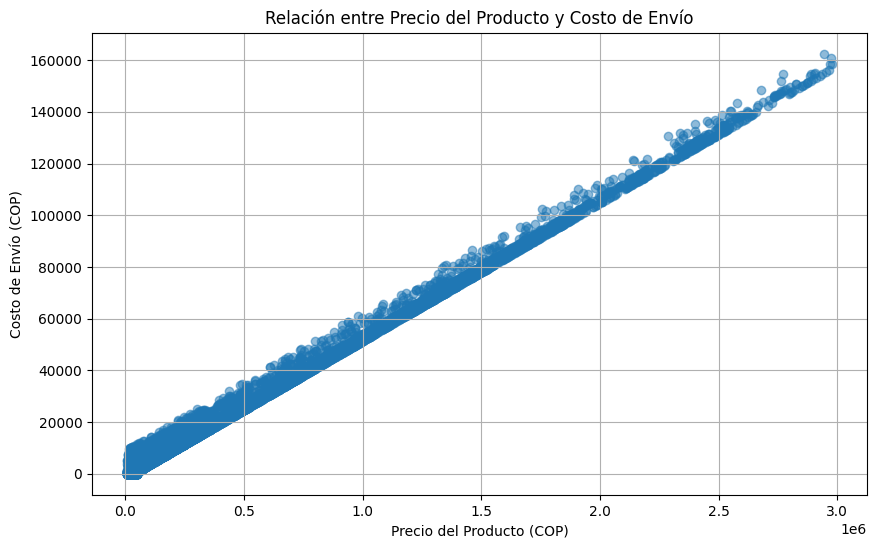

In [8]:
envio_promedio = tiendas['Costo de envío'].mean()
print(f"Costo promedio de envío: ${envio_promedio:,.2f} COP")

envio_por_ciudad = tiendas.groupby('Lugar de Compra')['Costo de envío'].mean().sort_values(ascending=False)
print("\nCosto de envío promedio por ciudad:")
print(envio_por_ciudad.to_string())

plt.figure(figsize=(10,6))
plt.scatter(tiendas['Precio'], tiendas['Costo de envío'], alpha=0.5)
plt.title('Relación entre Precio del Producto y Costo de Envío')
plt.xlabel('Precio del Producto (COP)')
plt.ylabel('Costo de Envío (COP)')
plt.grid(True)
plt.show()

In [11]:
facturacion_tienda = tienda['Precio'].sum()
facturacion_tienda2 = tienda2['Precio'].sum()
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

resumen_tiendas = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Facturación': [facturacion_tienda, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4],
    'Número de Ventas': [len(tienda), len(tienda2), len(tienda3), len(tienda4)]
})

tienda_menos_vendedora = resumen_tiendas.loc[resumen_tiendas['Facturación'].idxmin()]

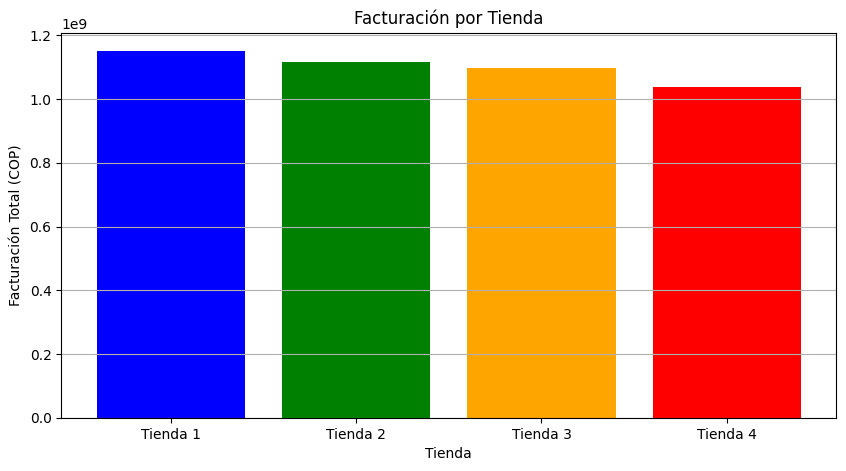

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(resumen_tiendas['Tienda'], resumen_tiendas['Facturación'], color=['blue', 'green', 'orange', 'red'])
plt.title('Facturación por Tienda')
plt.ylabel('Facturación Total (COP)')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.show()